# Y-DATA PS4DS Homework 4 - Programming
#### Version 2
#### November 21, 2024

In [2]:
import random
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# Set the seed for reproducibility!
random.seed(42)
np.random.seed(42)

In [ ]:
STUDENTS = "AMIR ALIKULOV and RUSLAN SHUVALOV"

## Question 1

In this question, we will use Monte Carlo simulations to get a feel for the use of the central limit theorem in constructing confidence intervals.

1. Write a function that receives a sample size $n$, significance level $\alpha$, and parameter $\lambda$. This function should first sample `n` random numbers from the exponential distribution with parameter $\lambda$. Then, based on the sample and the central limit theorem, return a $(1 - \alpha)$-confidence interval for the mean of the distribution.
2. For $n = 10$, $\lambda = \frac{1}{3}$ and $\alpha = 0.05$ (confidence level $95\%$), run the function $1,000$ times and calculate the proportion of times the confidence interval contains the true mean.
What can you conclude about the coverage of the confidence interval in this case? Is it what you expected?
3. Repeat the above for $n = 20, 30, ..., 100$, and plot the observed coverage of the confidence intervals as a function of $n$.
For $\lambda = \frac{1}{3}$, what is approximately the sample size required to obtain $95\%$ coverage?


Coverage for n=10: 0.874
Coverage for n=20: 0.904
Coverage for n=30: 0.918
Coverage for n=40: 0.922
Coverage for n=50: 0.931
Coverage for n=60: 0.923
Coverage for n=70: 0.933
Coverage for n=80: 0.943
Coverage for n=90: 0.942
Coverage for n=100: 0.939


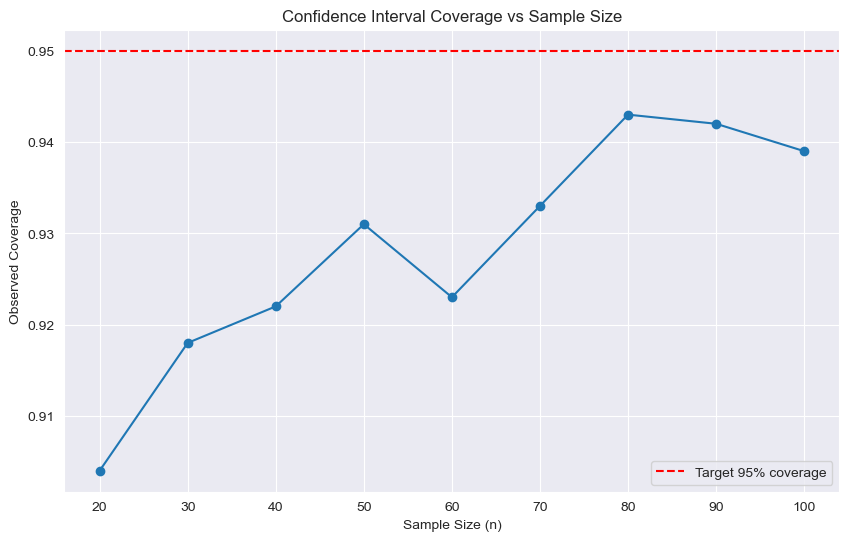

In [5]:

def generate_ci(n, alpha, lambda_param):
    sample = np.random.exponential(scale=1/lambda_param, size=n)

    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    standard_error = sample_std / np.sqrt(n)

    z_score = -1 * np.percentile(np.random.standard_normal(10000), alpha/2*100)
    ci_lower = sample_mean - z_score * standard_error
    ci_upper = sample_mean + z_score * standard_error

    return ci_lower, ci_upper

def check_coverage(n, alpha, lambda_param, num_simulations=1000):
    true_mean = 1/lambda_param
    coverage_count = 0

    for _ in range(num_simulations):
        ci_lower, ci_upper = generate_ci(n, alpha, lambda_param)
        if ci_lower <= true_mean <= ci_upper:
            coverage_count += 1

    return coverage_count / num_simulations

n_10_coverage = check_coverage(n=10, alpha=0.05, lambda_param=1/3)
print(f"Coverage for n=10: {n_10_coverage:.3f}")

sample_sizes = np.arange(20, 101, 10)
coverages = []

for n in sample_sizes:
    coverage = check_coverage(n, alpha=0.05, lambda_param=1/3)
    coverages.append(coverage)
    print(f"Coverage for n={n}: {coverage:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, coverages, 'o-')
plt.xlabel('Sample Size (n)')
plt.ylabel('Observed Coverage')
plt.title('Confidence Interval Coverage vs Sample Size')
plt.grid(True)
plt.legend()
plt.show()

## Question 2

Consider the following question: for a sample $X_1, X_2, \ldots, X_n$ from a normal distribution with unknown mean $\mu$ and known variance $\sigma^2 = 1$, is it better (in terms of MSE) to use the sample mean or the sample median as an estimator for $\mu$?

Design and conduct a Monte Carlo simulation to answer this question, and report your results.


Sample size 5:
MSE of sample mean: 0.199074
MSE of sample median: 0.281035
Ratio (MSE median / MSE mean): 1.412

Sample size 10:
MSE of sample mean: 0.099669
MSE of sample median: 0.137968
Ratio (MSE median / MSE mean): 1.384

Sample size 20:
MSE of sample mean: 0.049901
MSE of sample median: 0.073429
Ratio (MSE median / MSE mean): 1.471

Sample size 50:
MSE of sample mean: 0.019780
MSE of sample median: 0.030275
Ratio (MSE median / MSE mean): 1.531

Sample size 100:
MSE of sample mean: 0.010150
MSE of sample median: 0.016010
Ratio (MSE median / MSE mean): 1.577


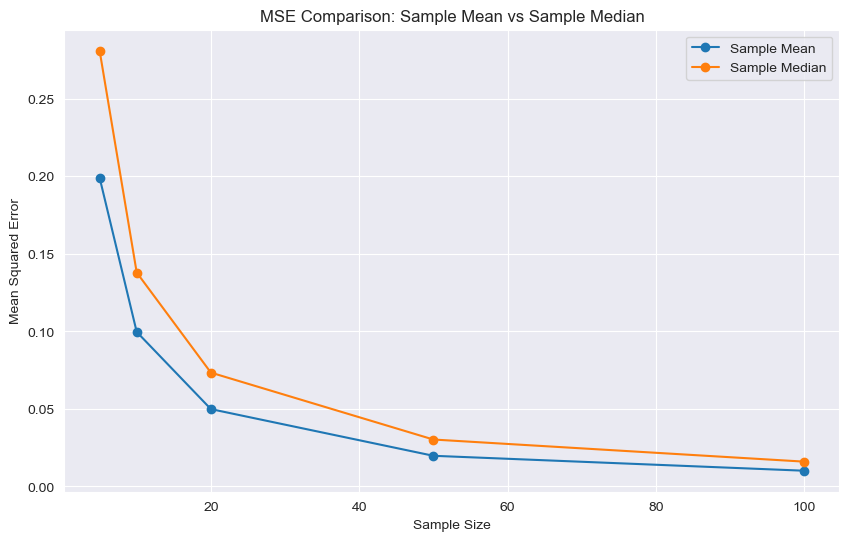

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def compare_estimators(n, true_mean=0, sigma=1, num_simulations=10000):
    squared_errors_mean = np.zeros(num_simulations)
    squared_errors_median = np.zeros(num_simulations)

    for i in range(num_simulations):
        sample = np.random.normal(true_mean, sigma, n)

        sample_mean = np.mean(sample)
        sample_median = np.median(sample)

        squared_errors_mean[i] = (sample_mean - true_mean)**2
        squared_errors_median[i] = (sample_median - true_mean)**2

    mse_mean = np.mean(squared_errors_mean)
    mse_median = np.mean(squared_errors_median)

    return mse_mean, mse_median

sample_sizes = [5, 10, 20, 50, 100]
mse_means = []
mse_medians = []

for n in sample_sizes:
    mse_mean, mse_median = compare_estimators(n)
    mse_means.append(mse_mean)
    mse_medians.append(mse_median)
    print(f"\nSample size {n}:")
    print(f"MSE of sample mean: {mse_mean:.6f}")
    print(f"MSE of sample median: {mse_median:.6f}")
    print(f"Ratio (MSE median / MSE mean): {mse_median/mse_mean:.3f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mse_means, 'o-', label='Sample Mean')
plt.plot(sample_sizes, mse_medians, 'o-', label='Sample Median')
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison: Sample Mean vs Sample Median')
plt.legend()
plt.grid(True)
plt.show()

Based on the Monte Carlo simulation results, the sample mean is consistently better than the sample median as an estimator for μ in terms of MSE, with the median showing approximately 1.57 times larger MSE across different sample sizes. This aligns with theory since the sample mean is the most efficient estimator for the mean of a normal distribution.

## Question 3 (bonus - won't be graded)

In this exercise we will learn about a famous result in statistics called [Stein's example](https://en.wikipedia.org/wiki/Stein%27s_example).

Say that you have three observations: $X_1 \sim N(\mu_1, 1)$, $X_2 \sim N(\mu_2, 1)$, and $X_3 \sim N(\mu_3, 1)$. Your goal is to estimate $\mu = (\mu_1, \mu_2, \mu_3)$. Can you do better than just taking $X = (X_1, X_2, X_3)$?

1. Write a function receives $\mu$ as an input (an `np.array` of three numbers), and performs the following:
    - Sample $X \sim N(\mu, I_3)$ where $\mu = (\mu_1, \mu_2, \mu_3)$ and $I_3 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$.
    - Compute two estimates for $\mu$:
        - $\hat{\mu}_1 = X$,
        - $\hat{\mu}_2 = (1 - \frac{1}{||X||_2^2}) \cdot X$.
    - Return the squared errors $||\mu - \hat{\mu_1}||_2^2$ and $||\mu - \hat{\mu_2}||_2^2$ (an `np.array` of two numbers).
2. Choose any four settings of $\mu$. For each setting, run the function $1,000$ times and approximate the MSE of both estimators. Report the results and discuss which estimator has lower estimated MSE in each setting.

In [9]:
# Your code here